In [ ]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve

In [ ]:
# Download necessary NLTK resources if not already available
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load your dataset
# The dataset should be uploaded into the notebook's files, if it's not just download the dataset and upload it and this should work
data = pd.read_csv('https://raw.githubusercontent.com/bulanov416/cs-4641-spam-detection/main/spam.csv?token=GHSAT0AAAAAACG5PHH354O3XYVNUIV4OWB4ZLPLTQA',encoding='latin-1')
# data.head()
# Drop irrelevant columns
data_cleaned = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

data_cleaned.columns = ['label', 'message']
data_cleaned['label'] = data_cleaned['label'].map({'ham': 0, 'spam': 1})

lemmatizer = WordNetLemmatizer() #Serves to replace misspellings with real words
#But wtf is it doing, it changes words that are actual words and seems to remove very common words

# Function to preprocess text data
def preprocess_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.isalpha() and word.lower() not in stopwords.words('english')]
    return ' '.join(lemmatized_tokens)

data_cleaned['message_clean'] = data_cleaned['message'].apply(preprocess_text)

from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data_cleaned['message_clean'])
y = data_cleaned['label']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


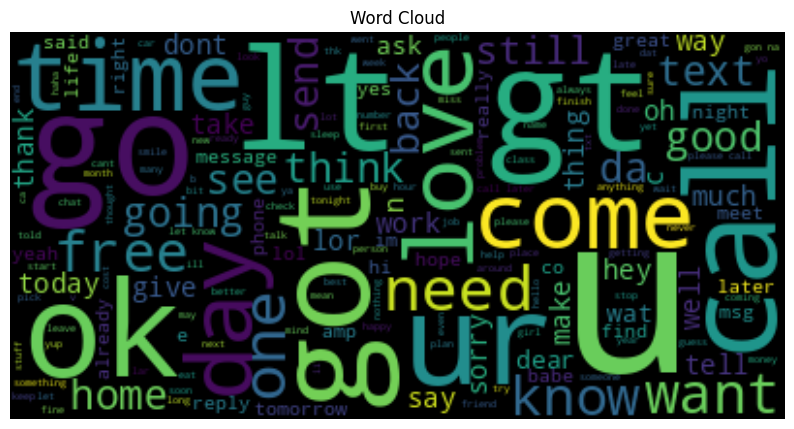

In [ ]:
from wordcloud import WordCloud

# Assuming X_clean is the cleaned text data
wordcloud = WordCloud().generate(' '.join(data_cleaned['message_clean']))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud')
plt.axis('off')
plt.show()

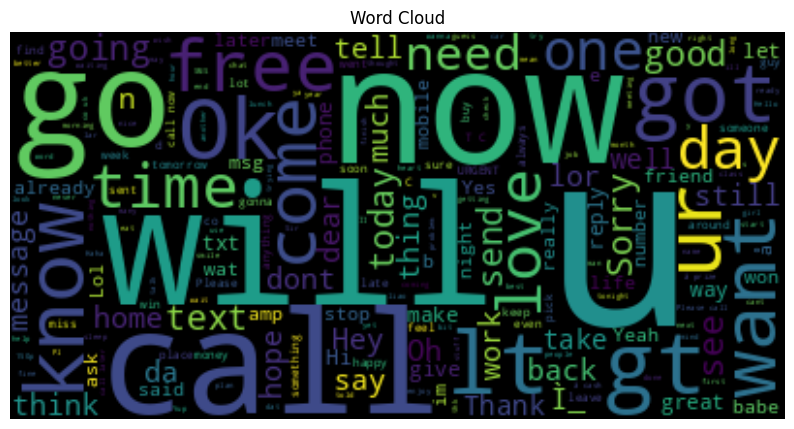

In [ ]:
wordcloud = WordCloud().generate(' '.join(data_cleaned['message']))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud')
plt.axis('off')
plt.show()

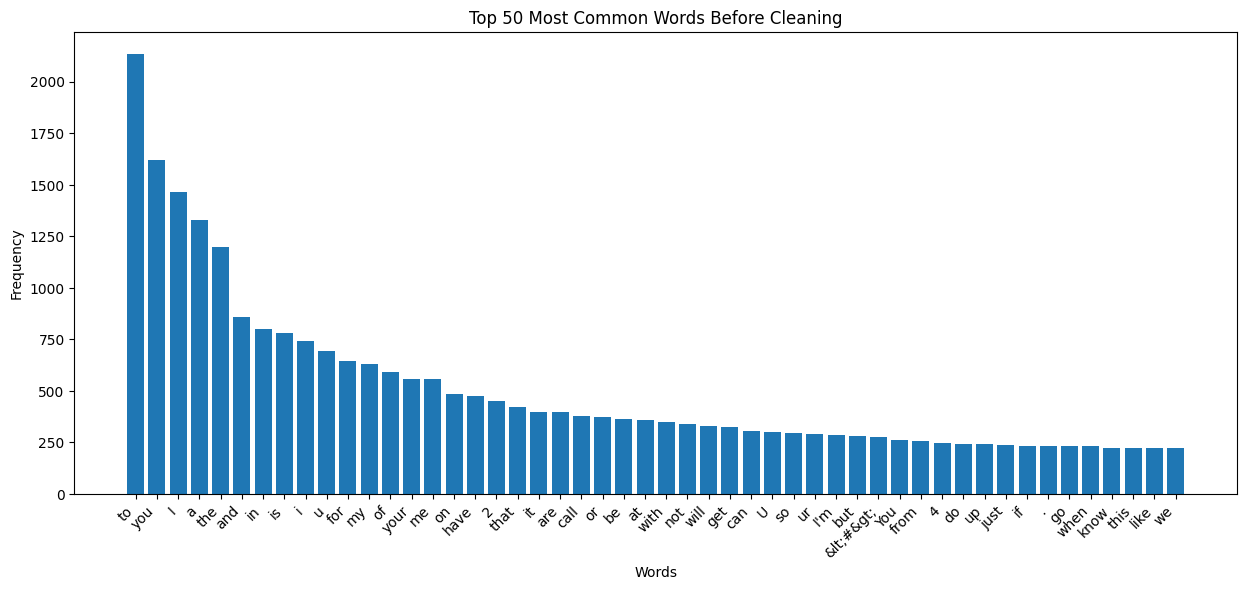

In [ ]:
from collections import Counter

all_words = ' '.join(data_cleaned['message']).split()
word_counts = Counter(all_words)

common_words = word_counts.most_common(50)

plt.figure(figsize=(15, 6))
plt.bar(*zip(*common_words))
plt.title('Top 50 Most Common Words Before Cleaning')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

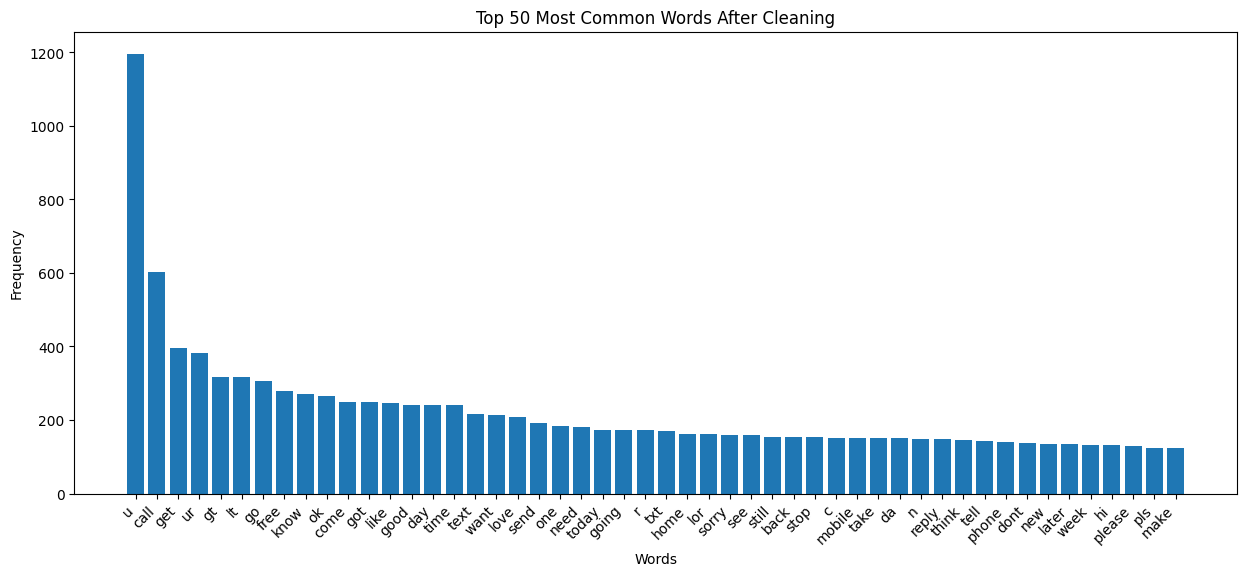

In [ ]:

# Assuming X_clean is the cleaned text data
all_words = ' '.join(data_cleaned['message_clean']).split()
word_counts = Counter(all_words)

common_words = word_counts.most_common(50)

plt.figure(figsize=(15, 6))
plt.bar(*zip(*common_words))
plt.title('Top 50 Most Common Words After Cleaning')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

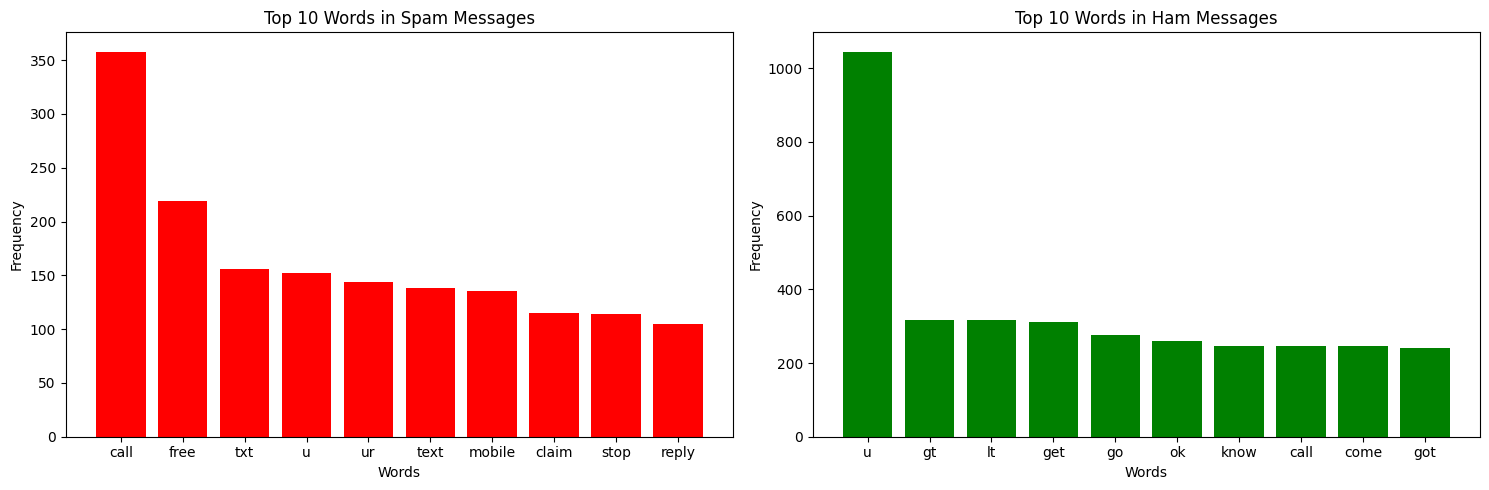

In [ ]:
from collections import Counter

# Combine cleaned messages with their corresponding labels
data = pd.DataFrame({'Message': data_cleaned['message_clean'], 'Label': data_cleaned['label']})

# Separate messages by label
spam_messages = ' '.join(data[data['Label'] == 1]['Message']).split()
ham_messages = ' '.join(data[data['Label'] == 0]['Message']).split()

# Count word occurrences for spam and ham messages
spam_word_counts = Counter(spam_messages)
ham_word_counts = Counter(ham_messages)

# Choose the top N words to display
top_n = 10
top_spam_words = dict(spam_word_counts.most_common(top_n))
top_ham_words = dict(ham_word_counts.most_common(top_n))

# Plotting the bar chart
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Spam Word Frequency Bar Chart
axes[0].bar(top_spam_words.keys(), top_spam_words.values(), color='red')
axes[0].set_title('Top {} Words in Spam Messages'.format(top_n))
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')

# Ham Word Frequency Bar Chart
axes[1].bar(top_ham_words.keys(), top_ham_words.values(), color='green')
axes[1].set_title('Top {} Words in Ham Messages'.format(top_n))
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

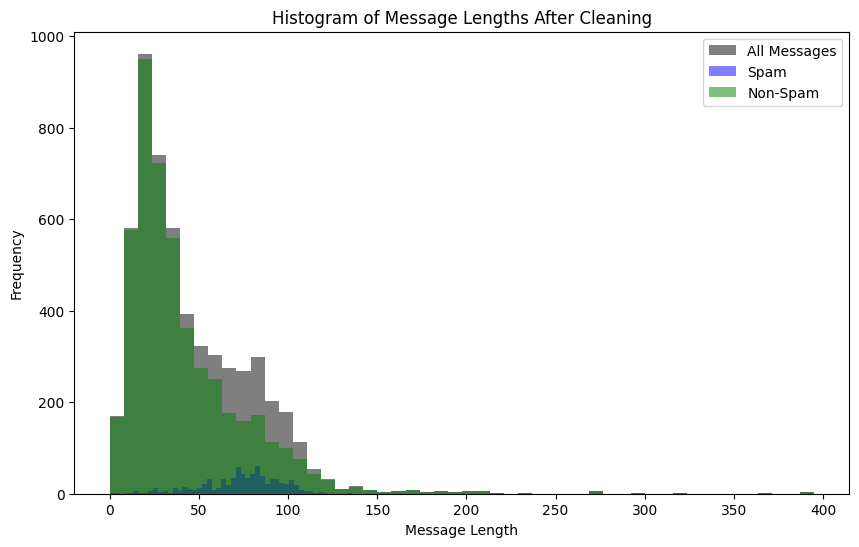

In [ ]:
# Assuming X_clean is the cleaned text data
message_lengths = [len(msg) for msg in data_cleaned['message_clean']]

plt.figure(figsize=(10, 6))
plt.hist(message_lengths, bins=50, alpha=0.5, color='black', label='All Messages')
plt.hist([len(msg) for i, msg in enumerate(data_cleaned['message_clean']) if data_cleaned['label'][i] == 1], bins=50, alpha=0.5, color='blue', label='Spam')
plt.hist([len(msg) for i, msg in enumerate(data_cleaned['message_clean']) if data_cleaned['label'][i] == 0], bins=50, alpha=0.5, color='green', label='Non-Spam')

plt.title('Histogram of Message Lengths After Cleaning')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


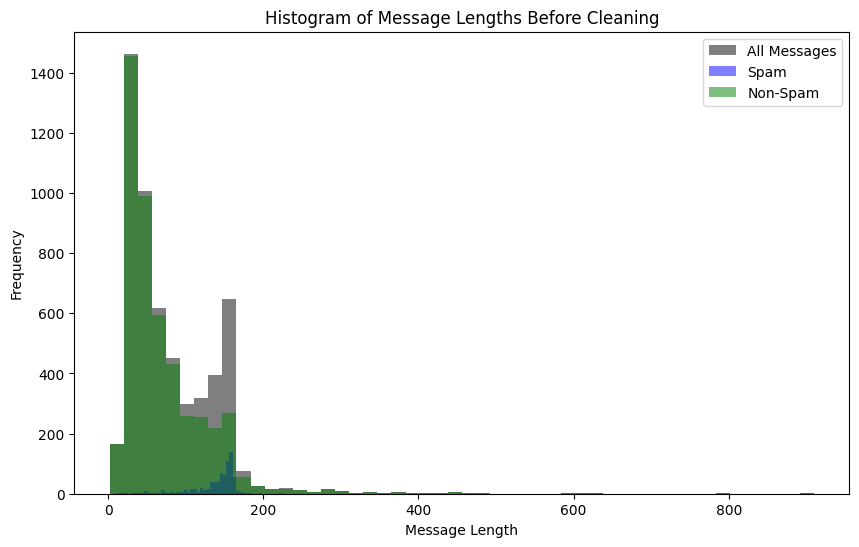

In [ ]:
message_lengths = [len(msg) for msg in data_cleaned['message']]

plt.figure(figsize=(10, 6))
plt.hist(message_lengths, bins=50, alpha=0.5, color='black', label='All Messages')
plt.hist([len(msg) for i, msg in enumerate(data_cleaned['message']) if data_cleaned['label'][i] == 1], bins=50, alpha=0.5, color='blue', label='Spam')
plt.hist([len(msg) for i, msg in enumerate(data_cleaned['message']) if data_cleaned['label'][i] == 0], bins=50, alpha=0.5, color='green', label='Non-Spam')

plt.title('Histogram of Message Lengths Before Cleaning')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
#Try with just CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
countVectorizer = CountVectorizer()
cX = countVectorizer.fit_transform(data_cleaned['message_clean'])
features = countVectorizer.get_feature_names_out()
features_df = pd.DataFrame(cX.toarray(), columns=features)

In [ ]:
print("num rows:", len(data_cleaned))
data_cleaned.head()
#features_df.head()

num rows: 5572


,label,message,message_clean
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts may...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though


In [ ]:
from sklearn.model_selection import train_test_split
from scipy.sparse import load_npz
import pandas as pd

#Split the data into test and train (Good idea to do this separately and save somewhere)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# x_train = load_npz('x_train.npz')
# x_test = load_npz('x_test.npz')

# y_train = pd.read_csv('y_train.csv')
# y_test = pd.read_csv('y_test.csv')

In [ ]:
# # the below code block is used to save the train and test data in colab so we don't have to run it over and over again and so it's constant

# from scipy.sparse import save_npz
# from google.colab import files

# # Saving the datasets as .npz files (suitable for sparse matrices)
# save_npz('x_train.npz', x_train)
# save_npz('x_test.npz', x_test)
# y_train.to_csv('y_train.csv', index=False)  # Assuming y_train and y_test are pandas Series or DataFrame
# y_test.to_csv('y_test.csv', index=False)

# # Downloading the files to your local machine
# files.download('x_train.npz')
# files.download('x_test.npz')
# files.download('y_train.csv')
# files.download('y_test.csv')

## Bernoulli NB Classifier

In [ ]:
#Perform BernoulliNB with default params
from sklearn.naive_bayes import BernoulliNB

# Initialize the Multinomial Naive Bayes classifier
bernoulli_nb_classifier = BernoulliNB()

# Train the classifier
bernoulli_nb_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = bernoulli_nb_classifier.predict(x_test)

# Calculate the evaluation metrics
#===========================================================================
#TODO CHANGE THESE METRICS to what we said we would use or add them to our report
#===========================================================================
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: ", accuracy ,"\nPrecision: ", precision, "\nRecall: ", recall, "\nf1 score:", f1)

Accuracy:  0.968609865470852 
Precision:  0.9133858267716536 
Recall:  0.8285714285714286 
f1 score: 0.8689138576779027


In [ ]:
#Perform Cross Validation on the dataset to find hyper parameters
#================================================================
#TODO rewrite this codeblock for BernoulliNB or any other classifier we use to improve it
#================================================================

from sklearn.model_selection import GridSearchCV

# Define the classifier (Random Forest in this case)
clf = BernoulliNB()

# Define the parameters to search through in grid search
parameters = {
    'alpha': [0.1, 1.0, 10.0],
    'force_alpha': [True, False],
    'binarize': [0, 0.5],
    'fit_prior': [True, False],
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(clf, parameters, cv=5, n_jobs=-1)
grid_search.fit(X, y)

# Print the best parameters and corresponding score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters found:  {'alpha': 0.1, 'binarize': 0, 'fit_prior': True, 'force_alpha': True}
Best cross-validation score: 0.98


In [ ]:
#Perform BernoulliNB with optimized params
from sklearn.naive_bayes import BernoulliNB

# Initialize the Multinomial Naive Bayes classifier
bernoulli_nb_classifier_op = BernoulliNB()
bernoulli_nb_classifier_op.alpha = 0.1
bernoulli_nb_classifier_op.force_alpha = True

# Train the classifier
bernoulli_nb_classifier_op.fit(x_train, y_train)

# Predict on the test set
y_pred_op = bernoulli_nb_classifier_op.predict(x_test)

# Calculate the evaluation metrics
#===========================================================================
#TODO CHANGE THESE METRICS to what we said we would use or add them to our report
#===========================================================================
accuracy_op = accuracy_score(y_test, y_pred_op)
precision_op = precision_score(y_test, y_pred_op)
recall_op = recall_score(y_test, y_pred_op)
f1_op = f1_score(y_test, y_pred_op)

print("Accuracy: ", accuracy_op ,"\nPrecision: ", precision_op, "\nRecall: ", recall_op, "\nf1 score:", f1)

Accuracy:  0.9757847533632287 
Precision:  0.8896551724137931 
Recall:  0.9214285714285714 
f1 score: 0.8689138576779027


## SVM Classifier

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

# Initialize the SVM classifier
svm_classifier = SVC()

# Train the classifier
svm_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred_svm = svm_classifier.predict(x_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)

print("Accuracy: ", accuracy ,"\nPrecision: ", precision, "\nRecall: ", recall, "\nf1 score:", f1)

Accuracy:  0.9730941704035875 
Precision:  1.0 
Recall:  0.7857142857142857 
f1 score: 0.88


In [ ]:
# Perform Cross Validation on the dataset to find hyperparameters
clf = SVC()

# Define the parameters for grid search
parameters = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(clf, parameters, cv=5, n_jobs=-1)
grid_search.fit(X, y)

# Print the best parameters and corresponding score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters found:  {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation score: 0.98


In [ ]:
# Initialize the SVM classifier with optimized parameters
svm_classifier_op = SVC(C=grid_search.best_params_['C'],
                        kernel=grid_search.best_params_['kernel'],
                        gamma=grid_search.best_params_['gamma'], probability = True)

# Train the classifier
svm_classifier_op.fit(x_train, y_train)

# Predict on the test set
y_pred_op_svm = svm_classifier_op.predict(x_test)

# Calculate the evaluation metrics
accuracy_op_svm = accuracy_score(y_test, y_pred_op_svm)
precision_op_svm = precision_score(y_test, y_pred_op_svm)
recall_op_svm = recall_score(y_test, y_pred_op_svm)
f1_op_svm = f1_score(y_test, y_pred_op_svm)

print("Optimized Accuracy: ", accuracy_op_svm ,"\nOptimized Precision: ", precision_op_svm, "\nOptimized Recall: ", recall_op_svm, "\nOptimized f1 score:", f1_op_svm)

Optimized Accuracy:  0.97847533632287 
Optimized Precision:  0.9461538461538461 
Optimized Recall:  0.8785714285714286 
Optimized f1 score: 0.911111111111111


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Random Forest Classifier
random_forest_classifier = RandomForestClassifier()

random_forest_classifier.fit(x_train, y_train)

# Predicting on the test set
y_pred_rf = random_forest_classifier.predict(x_test)

# Evaluating the initial model performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Initial Random Forest Performance:")
print("Accuracy: ", accuracy_rf, "\nPrecision: ", precision_rf, "\nRecall: ", recall_rf, "\nF1 Score: ", f1_rf)

Initial Random Forest Performance:
Accuracy:  0.979372197309417 
Precision:  1.0 
Recall:  0.8614457831325302 
F1 Score:  0.9255663430420712


### RandomSearch optimization

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

# Initialize the Random Forest Classifier
random_forest_classifier = RandomForestClassifier()

# Setting up Randomized Search for hyperparameter tuning
param_dist = {
    "n_estimators": sp_randint(10, 200),
    "max_depth": [10, 20, 30, None],
    "min_samples_split": sp_randint(2, 11),
    "min_samples_leaf": sp_randint(1, 5)
}

# Perform randomized search with a smaller number of iterations and cross-validation folds
n_iter_search = 50
random_search = RandomizedSearchCV(random_forest_classifier, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=3, n_jobs=-1)

# Fitting the model (replace X and y with your feature and target variable names)
random_search.fit(X, y)

# Best parameters and corresponding score from Randomized Search
print("Best Parameters from Randomized Search: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

Best Parameters from Randomized Search:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 197}
Best cross-validation score:  0.9772065627415848


### GridSearch optimization

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Random Forest Classifier
random_forest_classifier = RandomForestClassifier()

# Training the Random Forest Classifier
random_forest_classifier.fit(x_train, y_train)

# Predicting on the test set
y_pred_rf = random_forest_classifier.predict(x_test)

# Evaluating the initial model performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Initial Random Forest Performance:")
print("Accuracy: ", accuracy_rf, "\nPrecision: ", precision_rf, "\nRecall: ", recall_rf, "\nF1 Score: ", f1_rf)

# Setting up Grid Search for hyperparameter tuning
parameters_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(random_forest_classifier, parameters_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(X, y)

# Best parameters and corresponding score from Grid Search
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Best Parameters from Grid Search:", best_params_rf)
print("Best Grid Search Score: ", best_score_rf)


Initial Random Forest Performance:
Accuracy:  0.968609865470852 
Precision:  0.972972972972973 
Recall:  0.7714285714285715 
F1 Score:  0.8605577689243028


KeyboardInterrupt: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Using the best parameters from the grid search
best_params = grid_search_rf.best_params_

# Initialize the Random Forest Classifier with the optimized parameters
optimized_random_forest = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf']
)

# Training the optimized Random Forest Classifier
optimized_random_forest.fit(x_train, y_train)

# Predicting on the test set with the optimized classifier
y_pred_optimized_rf = optimized_random_forest.predict(x_test)

# Evaluating the optimized model performance
accuracy_optimized_rf = accuracy_score(y_test, y_pred_optimized_rf)
precision_optimized_rf = precision_score(y_test, y_pred_optimized_rf)
recall_optimized_rf = recall_score(y_test, y_pred_optimized_rf)
f1_optimized_rf = f1_score(y_test, y_pred_optimized_rf)

print("Optimized Random Forest Performance:")
print("Accuracy: ", accuracy_optimized_rf, "\nPrecision: ", precision_optimized_rf, "\nRecall: ", recall_optimized_rf, "\nF1 Score: ", f1_optimized_rf)

## Results

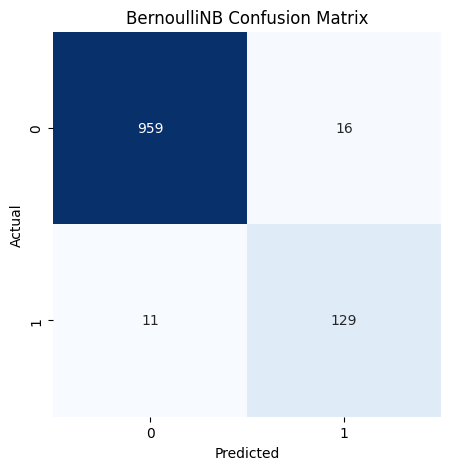

In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix for Optimized BernoulliNB
plt.figure(figsize=(5, 5))
cm = confusion_matrix(y_test, y_pred_op)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('BernoulliNB Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

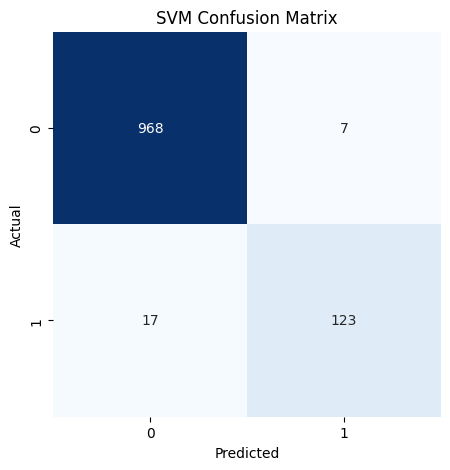

In [ ]:
# Confusion Matrix for Optimized SVM
plt.figure(figsize=(5, 5))
cm = confusion_matrix(y_test, y_pred_op_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix for Optimized Random Forest
plt.figure(figsize=(5, 5))
cm = confusion_matrix(y_test, y_pred_optimized_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

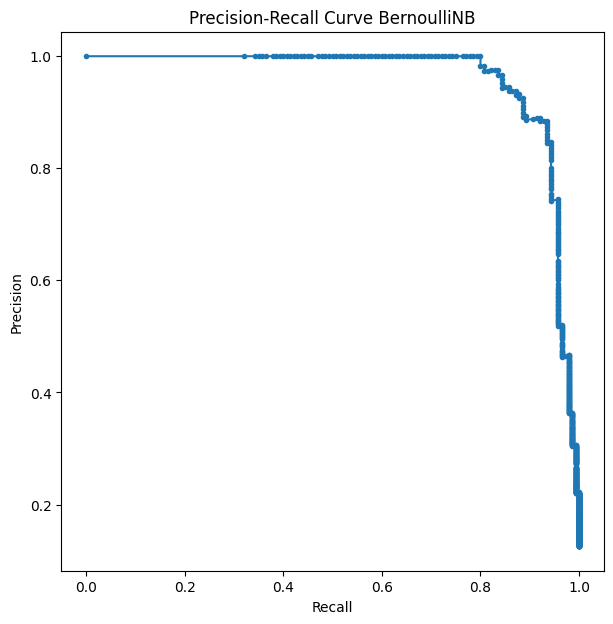

In [ ]:
# Precision-Recall Curve for Optimized BernoulliNB
y_prob = bernoulli_nb_classifier_op.predict_proba(x_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(7, 7))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve BernoulliNB')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

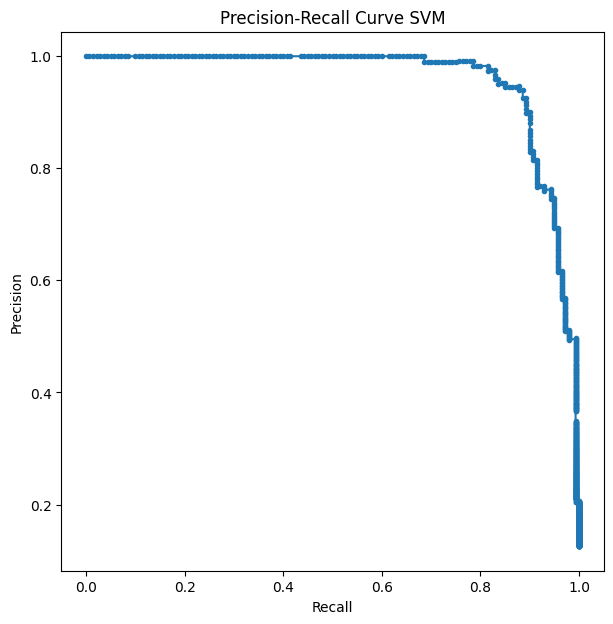

In [ ]:
# Precision-Recall Curve for Optimized SVM
y_prob = svm_classifier_op.predict_proba(x_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(7, 7))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve SVM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

#Precision-Recall Curve for optimized Random Forest
y_prob_rf = optimized_random_forest.predict_proba(x_test)[:, 1]
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob_rf)
plt.figure(figsize=(7, 7))
plt.plot(recall_rf, precision_rf, marker='.')
plt.title('Precision-Recall Curve - Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()